Introduction text
https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/
    

In [96]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt

In [111]:
# Total number of arms
N_ARMS = 6

# probabilities
p = np.random.rand(N_ARMS)
highest_prob_arm = np.argmax(p)
print("The arm with the highest probability is at index : " + str(highest_prob_arm) + " \nits probability is : " + str(p[highest_prob_arm]))

initial_money = 1000
price_per_play = 0.5
reward = 1

The arm with the highest probability is at index : 4 
its probability is : 0.9073232968628338


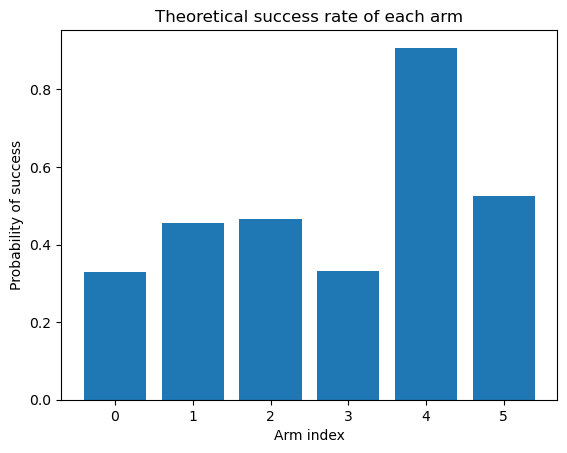

In [126]:
fig = plt.figure()
y_axis = p

# Create bar chart
plt.bar(range(len(y_axis)), y_axis)

# Add labels and title
plt.xlabel("Arm index")
plt.ylabel("Probability of success")
plt.title("Theoretical success rate of each arm")

# Show the plot
plt.show()

# Strategy 1 : Explore then exploit

For this, we explore by playing a 500 times each arm, then depending on which one got us the most wins, we decide to commit to it.

In [134]:
explore_per_arm = 500

money_left = initial_money - explore_per_arm * price_per_play
print("Money left : ", money_left)

results_all_arms = np.zeros((N_ARMS, explore_per_arm))
print("We have the arms in the rows, and results of explore in the columns " + str(np.shape(results_all_arms)))

for arm_index in range(N_ARMS):
    results_all_arms[arm_index, :] = np.random.choice([0, 1], size=(1, explore_per_arm), p=[1-float(p[arm_index]), float(p[arm_index])])
    
results_all_arms

Money left :  750.0
We have the arms in the rows, and results of explore in the columns (6, 500)


array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [135]:
end_of_explore_results = np.sum(results_all_arms, axis=1)

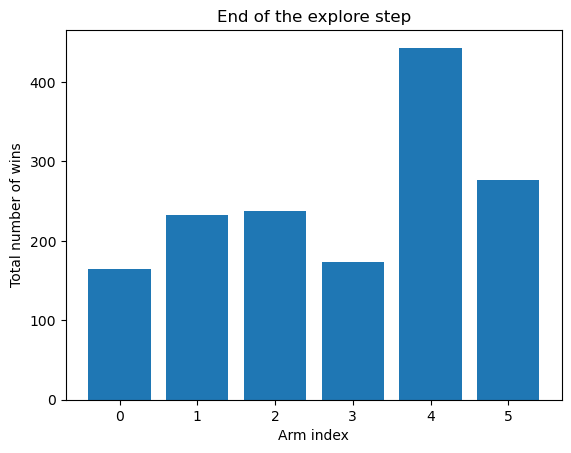

In [136]:
fig = plt.figure()
y_axis = p

# Create bar chart
plt.bar(range(len(end_of_explore_results)), end_of_explore_results)

# Add labels and title
plt.xlabel("Arm index")
plt.ylabel("Total number of wins")
plt.title("End of the explore step")

# Show the plot
plt.show()

In [139]:
index_with_most_wins = np.argmax(end_of_explore_results)
print("The arm that won the most is : " + str(index_with_most_wins) + " with " + str(int(end_of_explore_results[index_with_most_wins])) + " wins.")

The arm that won the most is : 4 with 443 wins.


Strategy 2 : Explore then exploit - by elimination

Strategy 3 : Continuous approach